In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

training
min is:  1
max is:  8
Optimized a step!
Optimized a step!
Optimized a step!
prediction!
vasualization!
9.33571428571 1.43571428571


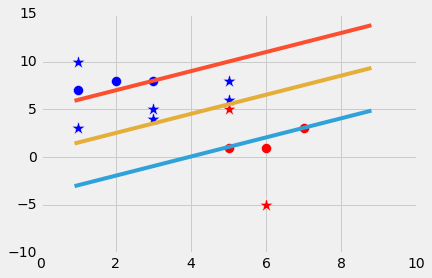

In [16]:
class Suport_Vector_Machine():
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        if visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    # this will be our traing routines to train the models using known data
    def fit(self, data):
        self.data = data
        # here we need to populate the following dictionary in a format like => { \\w\\: [w,b]}
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]    # we have to try all the orientations
        
        # need to find out the max and min features within the training dataset
        self.max_feature_value = -99999
        self.min_feature_value = 99999
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    if self.max_feature_value < feature:
                        self.max_feature_value = feature
                    if self.min_feature_value > feature:
                        self.min_feature_value = feature
        
        print("min is: ", self.min_feature_value)
        print("max is: ", self.max_feature_value)
        # the last range of stepping (0.001) is quite expensive!
        step_sizes = [self.max_feature_value*0.1, self.max_feature_value*0.01, self.max_feature_value*0.001]
        
        # define b related parameters
        b_range_multiple = 5              # this is extremely expensive
        b_multiple = 5    # we don't need to take as small steps with b was we do for w
        latest_optimum = self.max_feature_value*10 
            
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False    # we can do this because it is a convex problem!
            while not optimized:
                # optimize b here
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple), 
                                   self.max_feature_value*b_range_multiple, 
                                   step*b_multiple):
                    
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        # the following is the weakest link in SVM, so SMO is trying to fix it...
                        # testing: yi * (xi,w) + b
                        for yi in self.data:
                            for xi in self.data[yi]:                                
                                if not yi*(np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                                    break
                                
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                                
                if w[0] < 0:
                    optimized = True
                    print("Optimized a step!")
                else:
                    w = w - step
                
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]];            # here \\w\\: [w, b]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step*2
                
    
    def predict(self, features):
        # the goal is to predict the features passed in to see what sign the following formular returns
        # sign( x.w + b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        
        return classification
    
    def visualize(self):
        # plot the data points first
        [[self.ax.scatter(x[0], x[1], s=100, c=self.colors[i]) for x in self.data[i]] for i in self.data]
        
        # now for hyperplane=x.w + b. So v = x.w + b
        # pos sv: 1 while neg sv: -1 and the decision boundary is 0
        def hyperplane(x, w, b, v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # positive suport vector
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2])
        
        # negative suport vector
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2])
        
        # decision boundary
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        print(db2, db1)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2])
        
        
data_dict = {-1:np.array([[1,7], [2,8], [3,8],]), 
              1:np.array([[5,1], [6,1], [7,3],])}
        
svm = Suport_Vector_Machine()
print("training")
svm.fit(data_dict)

print("prediction!")
predict_us = [[1,10], [1,3], [3,4], [3,5], [5,5], [5,6], [6,-5],[5,8]]
for pred in predict_us:
    svm.predict(pred)
    
print('vasualization!')
svm.visualize()
        
        
        
        